# Data Analysis Project: E-Commerce Public Dataset

## Menentukan Pertanyaan Bisnis

Beberapa pertanyaan yang ingin saya jawab dari *dataset* adalah sebagai berikut ini:

*   Bagaimana jumlah Review Score Pengguna?
*   Bagaimana Distribusi Metode Pembayaran, Mana yang Paling Sering Digunakan?
*   Bagaimana hasil penjualan produk?
*   Demografik Pengguna dari setiap State
*   Bagaimana Pengaruh Harga Barang terhadap Review Pengguna?
*   Bagaimana Hubungan Waktu Pengiriman dengan Review Pengguna?

## Import Semua Packages/Library yang Digunakan

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [9]:
product_df = pd.read_csv("/content/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv("/content/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
order_items_df = pd.read_csv("/content/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [12]:
order_payments_df = pd.read_csv("/content/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [13]:
order_reviews_df = pd.read_csv("/content/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [14]:
order_df = pd.read_csv("/content/orders_dataset.csv")
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [15]:
geolocation_df = pd.read_csv("/content/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [16]:
customers_df = pd.read_csv("/content/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [17]:
product_category_df = pd.read_csv("/content/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor



**Insight:**
1. product_dataset: Berisikan informasi dari berbagai product yang tersedia secara sangat detail.

2. sellers_dataset: Berisikan informasi detail dari penjual di platform tersebut.

3. order_items_dataset: Informasi semua pemesanan yang dilakukan.

4. order_payments_dataset: Metode pembayaran dari masing-masing orderan barang.

5. order_reviews_dataset: Berisikan review dari semua order yang telah sampai.

6. orders_dataset: Berisikan seluruh track record dari semua dataset yang ada.

7. geolocation_dataset: Berisikan informasi mengenai kota-kota dalam cakupan servis dari perusahaan tersebut.

8. customer_dataset: Seluruh data pengguna e-commerce.

Dari masing-masing feature atau informasi dalam dataset tersebut bisa digunakan untuk explatory selanjutnya.

### Assessing Data

#### Menilai data product_dataset

In [18]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [19]:
product_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


Terdapat cukup banyak data yang missing di total sebanyak 610 product, dan juga 2 data yang hilang di masing-masing product wight, length, height, dan width.

In [20]:
print("Data duplikat: ", product_df.duplicated().sum())

Data duplikat:  0


Untungnya tidak ada data duplikat pada dataset ini:

**Kesimpulan:** Terdapat missing value pada product_df.

#### Menilai data sellers_dataset

In [21]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [22]:
print("Data duplikat: ", sellers_df.duplicated().sum())

Data duplikat:  0


Pada sellers_df terlihat bahwa tidak adanya data yang hillang, data type yang salah, dan juga data yang duplikat

**Kesimpulan:** pada dataset ini tidak ada kendala.

#### Menilai data order_items_dataset

In [23]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Terdapat kesalahan pada bagian shipping_limit_date. Seharusnya menggunakan data type yaitu 'datetime'

In [24]:
print("Data duplikat: ", order_items_df.duplicated().sum())

Data duplikat:  0


**Kesimpulan:** Perlu konversi tipe data menjadi datetime

#### Menilai data order_payments_dataset

In [25]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [26]:
print("Data duplikat: ", order_payments_df.duplicated().sum())

Data duplikat:  0


In [27]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Tidak terdapat masalah pada order payments dataset

#### Menilai data order_reviews_dataset

In [28]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Terdapat kesalahan data type pada review_creation_date dan juga review_answer_timestamp. Seharusnya menggunakan menggunakan tipe datetime.

In [29]:
print("Data duplikat: ", order_reviews_df.duplicated().sum())

Data duplikat:  0


In [30]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Saya kurang paham pada bagian ini, apakah comment dan juga review bersifat wajib atau tidak. Untuk sekarang saya asumsikan bersifat 'No Comment', bersifat optional.


**Kesimpulan:** terdapat kesalahan pada tipe data di review_creation_date dan review_answer_timestamp

#### Menilai data orders_dataset

In [31]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Setiap kolom yang berisikan data waktu (date) perlu dikonversi menjadi bentuk datetime.

In [32]:
print("Data duplikat: ", order_df.duplicated().sum())

Data duplikat:  0


In [33]:
order_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Terdapat juga kolom dataset yang missing

**Kesimpulan:**
1. terdapat kesalahan pada format order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date yang seharusnya menggunakan data tipe datetime.
2. Missing value pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date

#### Menilai data geolocation_dataset

In [34]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [35]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


Tidak terapat masalah pada dataset geolocation.

#### Menilai data customer_dataset

In [36]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [37]:
print("Data duplikat: ", customers_df.duplicated().sum())

Data duplikat:  0


In [38]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


Dataset dari customer terlihat bahwa tidak ada masalah, maka tidak perlu dilakukan cleaning untuk dataset ini.

#### Menilai data product_category_name_translation

In [39]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [40]:
product_category_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [41]:
product_category_df.duplicated().sum()

0

Tidak terdapat masalah pada dataset ini.

**Insight:**
1. product_df: terdapat 610 missing value pada kolom product_category_name, product_name_lenght, product_description_lenght, product_photos_qty. Sedangkan 2 missing value pada kolom product_weight_g, product_length_cm, product_height_cm, dan product_width_cm.
2. sellers_df: Tidak ada masalah
3. order_items_df: Kesalahan datatype pada kolom shipping_limit_date, seharusnya menggunakan datetime dan tidak object.
4. order_payments_dataset: Tidak ada masalah
5. order_reviews_dataset: Terdapat kesalahan data type pada review_creation_date dan juga review_answer_timestamp. Seharusnya menggunakan menggunakan tipe datetime dan tidak object.
6. orders_dataset:
- terdapat kesalahan pada format order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date yang seharusnya menggunakan data tipe datetime.
- Missing value pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date
7. geolocation_df: Tidak terdapat masalah
8. customers_df: Tidak terdapat masalah
9. product_category_df: Tidak terdapat masalah


In [42]:
import pandas as pd
from prettytable import PrettyTable

data_issues = [
    ["product_df", "Missing values pada beberapa kolom (610)"],
    ["product_df", "Missing values pada kolom ukuran dan berat produk (2)"],
    ["sellers_df", "Tidak ada masalah"],
    ["order_items_df", "shipping_limit_date salah tipe data (seharusnya datetime)"],
    ["order_payments_df", "Tidak ada masalah"],
    ["order_reviews_df", "review_creation_date dan review_answer_timestamp salah tipe data (seharusnya datetime)"],
    ["order_df", "Kesalahan format datetime pada beberapa kolom"],
    ["order_df", "Missing values pada order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date"],
    ["geolocation_df", "Tidak ada masalah"],
    ["customers_df", "Tidak ada masalah"],
    ["product_category_df", "Tidak ada masalah"]
]

table = PrettyTable(["Dataset", "Masalah"])
for row in data_issues:
    table.add_row(row)

print(table)

+---------------------+--------------------------------------------------------------------------------------------------------+
|       Dataset       |                                                Masalah                                                 |
+---------------------+--------------------------------------------------------------------------------------------------------+
|      product_df     |                                Missing values pada beberapa kolom (610)                                |
|      product_df     |                         Missing values pada kolom ukuran dan berat produk (2)                          |
|      sellers_df     |                                           Tidak ada masalah                                            |
|    order_items_df   |                       shipping_limit_date salah tipe data (seharusnya datetime)                        |
|  order_payments_df  |                                           Tidak ada masalah              

### Cleaning Data

#### product_df

In [43]:
product_df["product_category_name"] = product_df["product_category_name"].fillna("unknown")
product_df["product_name_lenght"] = product_df["product_name_lenght"].fillna(product_df["product_name_lenght"].mean())
product_df["product_description_lenght"] = product_df["product_description_lenght"].fillna(product_df["product_description_lenght"].mean())
product_df["product_photos_qty"] = product_df["product_photos_qty"].fillna(product_df["product_photos_qty"].median())

Dikarenakan pada dataset ini setiap data yang missing tidak dapat diketahui secara pasti maka disini saya menggunakan rata-rata untuk mengganti nilai missing tersebut. Saya ganti pada kolom:
1. product_category_name
2. product_name_lenght
3. product_description_lenght
4. product_photos_qty.

Nilai yang dimasukan ke dalam missing value tersebut adalah rata-rata/mean atau nilai unknown, tergantung dari tipe data apa.

In [44]:
# Mengisi missing values pada ukuran dan berat dengan nilai median
cols_to_fill = ["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]
for col in cols_to_fill:
    product_df[col] = product_df[col].fillna(product_df[col].median())

saya mengubah misisng value pada kolom ukuran dan juga berat menggunakan nilai median, yaitu pada kolom:
1. product_weight_g
2. product_length_cm
3. product_height_cm
4. product_width_cm

Dengan begini tidak perlu menghapus data-data dari product, dan walaupun data dari median tidak sesuai dengan data asli tidak akan berpengaruh besar kepada keseluruhan dataset tersebut.

In [45]:
product_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


Cek kembali value apakah masih terdapat missing value atau tidak, hasil menunjukan bahwa data berhasil diisi.

#### order_items_df

In [46]:
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])

In [47]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### order_reviews_dataset

Mengubah kolom review_creation_date dan review_answer_timestamp menjadi datetime

In [48]:
order_reviews_df["review_creation_date"] = pd.to_datetime(order_reviews_df["review_creation_date"])
order_reviews_df["review_answer_timestamp"] = pd.to_datetime(order_reviews_df["review_answer_timestamp"])

In [49]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


#### order_dataset

Mengubah format menjadi datetime

In [50]:
date_cols = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
             "order_delivered_customer_date", "order_estimated_delivery_date"]
for col in date_cols:
    order_df[col] = pd.to_datetime(order_df[col])

Mengisi missing value dengan value estimasi atau perkiraan:
1. order_approved_at bisa diganti dengan order_purchase_timestame karena pemesanan akan di approved sesaat setelah pembelian.
2. order_delivered_carrier_date diganti dengan menggunakan order_estimated_delivery_date, karena bisa digunakan sebagai gambaran umum dibandingkan dengan harus menghapus dataset tersebut.
3. sama seprti sebelumnya kolom order_delivered_customer_date bisa diganti dengan order_estimated_delivery_date

In [51]:
order_df["order_approved_at"] = order_df["order_approved_at"].fillna(order_df["order_purchase_timestamp"])
order_df["order_delivered_carrier_date"] = order_df["order_delivered_carrier_date"].fillna(order_df["order_estimated_delivery_date"])
order_df["order_delivered_customer_date"] = order_df["order_delivered_customer_date"].fillna(order_df["order_estimated_delivery_date"])

In [52]:
order_df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


**Insight:**
- Dataset yang memiliki keanehan telah berhasil dibenarkan.
- Beberapa masalah yang muncul pada dataset ini antara lain adalah missing value dan data type yang tidak sesuai.

## Exploratory Data Analysis (EDA)

### Bagian ini mengecek informasi apa saja yang bisa diambil dari dataset tersebut.

In [53]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


**Insight:**
- Sebagian ebsar pelanggan berasal dari kota Sao Paulo
- Terdapat pelanggan yang melakukan lebih dari satu transaksi, bisa di cek dari adanya duplikasi dari ID pelanggan
- Kode pos tersebar dari daerah yang cukup luas, terutama di daerah perkotaan

In [54]:
customers_df.customer_id.count()

99441

Total dari jumlah pelanggan yang ada adalah sebanyak 99.441 orang

Jumlah

#### Distribusi Status Pesanan

<Axes: title={'center': 'Distribusi Status Pesanan'}, ylabel='order_status'>

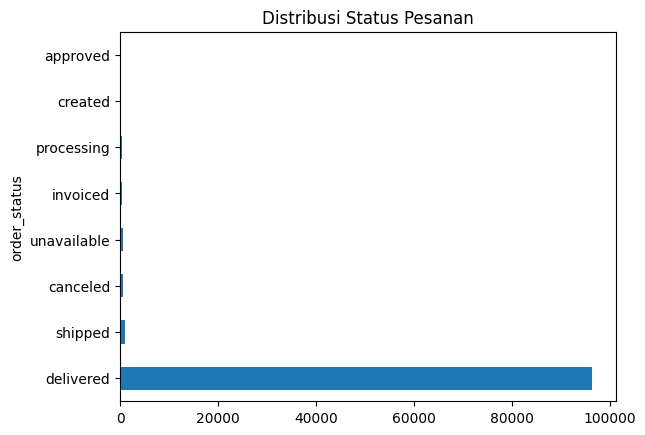

In [55]:
order_df['order_status'].value_counts().plot(kind='barh', title='Distribusi Status Pesanan')

Distribusi status pesanan sangat baik dengan jumlah pesanan yang dibatalkan sangat sedikit dan mendekati nol.

#### Jumlah Review Score

In [56]:
review_counts = order_reviews_df["review_score"].value_counts().sort_index()
print("Jumlah Review Score:\n", review_counts.describe())
print(review_counts)

Jumlah Review Score:
 count        5.000000
mean     19844.800000
std      21743.780322
min       3151.000000
25%       8179.000000
50%      11424.000000
75%      19142.000000
max      57328.000000
Name: count, dtype: float64
review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64


Riview dari penjualan lebih signifikan positif dibandingkan negatif, namun masih terdapat sejumlah 10000 yang memberikan nilai 1 pada skor.

#### Distribusi Metode Pembayaran

In [57]:
payment_counts = order_payments_df["payment_type"].value_counts()
print("\nDistribusi Metode Pembayaran:\n", payment_counts)


Distribusi Metode Pembayaran:
 payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


Metode pembayaran yang paling sering digunakan oleh pelanggan adalah dengan credit card

#### Jumlah pesanan dari setiap kategori produk

In [58]:
merged_product_orders = order_items_df.merge(product_df, on="product_id")
category_counts = merged_product_orders["product_category_name"].value_counts().head(10)
print("\nProduk Berdasarkan Jumlah Pesanan:\n", category_counts)


Produk Berdasarkan Jumlah Pesanan:
 product_category_name
cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: count, dtype: int64


Barang yang paling banyak dibeli adalah cama_mesa_banho yaitu bed_bath_table

#### Jumlah pengguna dari setiap state

In [59]:
customer_counts = customers_df["customer_state"].value_counts()
print("\nJumlah Pelanggan per State:\n", customer_counts)


Jumlah Pelanggan per State:
 customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64


Jumlah pengguna didominasi oleh pengguna dengan asal San Paulo dengan jumlah melebihi 40.000

#### Rata-rata harga produk berdasarkan skor review

In [60]:
df_price_review = order_items_df.merge(order_reviews_df, on="order_id")
avg_price_per_score = df_price_review.groupby("review_score")["price"].mean()
print("\nRata-rata Harga Produk per Review Score:\n", avg_price_per_score)


Rata-rata Harga Produk per Review Score:
 review_score
1    127.350068
2    115.849138
3    110.059704
4    118.602628
5    121.219825
Name: price, dtype: float64


#### Hubungan waktu pengiriman dengan skor review

In [61]:
df_delivery_review = order_df.merge(order_reviews_df, on="order_id")
df_delivery_review["delivery_time"] = (df_delivery_review["order_delivered_customer_date"] - df_delivery_review["order_purchase_timestamp"]).dt.days
avg_delivery_time = df_delivery_review.groupby("review_score")["delivery_time"].mean()
print("\nRata-rata Waktu Pengiriman per Review Score:\n", avg_delivery_time)


Rata-rata Waktu Pengiriman per Review Score:
 review_score
1    21.493610
2    16.697239
3    14.038636
4    11.958782
5    10.290765
Name: delivery_time, dtype: float64


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana jumlah Review Score Pengguna?

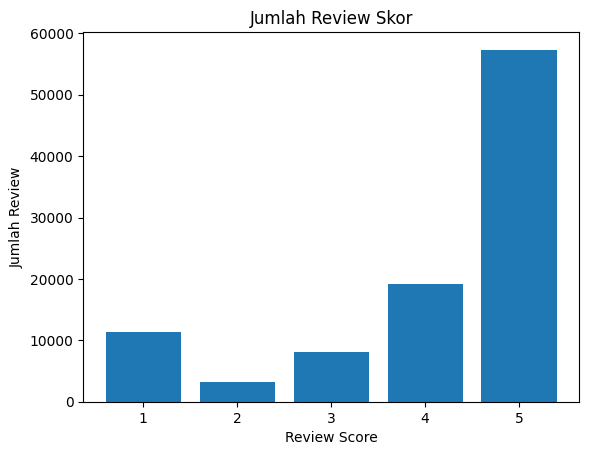

In [62]:
review_counts = order_reviews_df["review_score"].value_counts().sort_index()
review_counts.describe()

plt.bar(review_counts.index.astype(str), review_counts.values)
plt.title("Jumlah Review Skor")
plt.xlabel("Review Score")
plt.ylabel("Jumlah Review")
plt.show()

**Insight:**
Sebagian besar review score menunjukan nilai yang baik yaitu pada score 5. Tapi score review 1 masih bisa dibilang cukup banyak dengan jumlah menyentuh 10000 review.

### Pertanyaan 2: Bagaimana Distribusi Metode Pembayaran, Mana yang Paling Sering Digunakan?

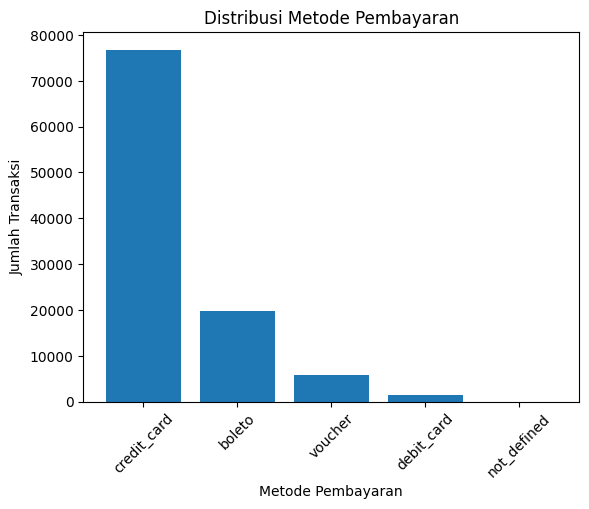

In [63]:
payment_counts = order_payments_df["payment_type"].value_counts()

plt.bar(payment_counts.index, payment_counts.values)
plt.xticks(rotation=45)
plt.title("Distribusi Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.show()

**Insight:**
Metode pembayaran yang paling sering digunakan adalah dengan menggunakan credit card

### Pertanyaan 3: Bagaimana hasil penjualan produk?

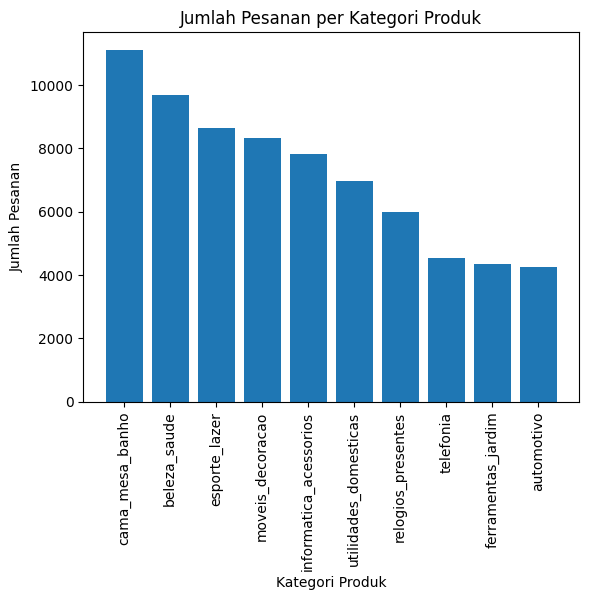

In [64]:
merged_product_orders = order_items_df.merge(product_df, on="product_id")
category_counts = merged_product_orders["product_category_name"].value_counts().head(10)

plt.bar(category_counts.index, category_counts.values)
plt.xticks(rotation=90)
plt.title("Jumlah Pesanan per Kategori Produk")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Pesanan")
plt.show()

**Insight:**
Barang terlaris yang di adalah produk dengan kategori bed_bath_table, bila diurutkan dari 10 besar maka urutannya sebagai berikut ini:
1. Bed Bath Table
2. Health Beauty
3. Sports Leisure
4. Furniture Decore
5. Computer Accessories
6. Housewares
7. Watches Gifts
8. Telephony
9. Garden Tools
10. Auto (Otomotif)

### Pertanyaan 4: Demografik Pengguna dari setiap State

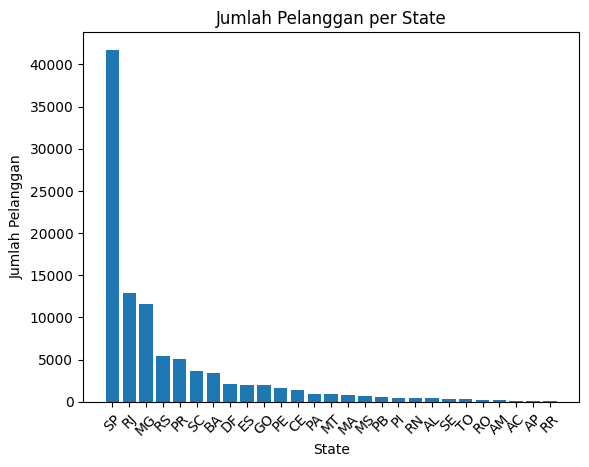

In [65]:
customer_counts = customers_df["customer_state"].value_counts()

plt.bar(customer_counts.index, customer_counts.values)
plt.xticks(rotation=45)
plt.title("Jumlah Pelanggan per State")
plt.xlabel("State")
plt.ylabel("Jumlah Pelanggan")
plt.show()

**Insight:**
Hasil gambar dengan menggunakan grafik batang menunjukan perbedaan yang sangat besar, yang dimana didominasi oleh pengguna di state San Paulo dengan total melebihi 40000 pengguna atau lebih tepatnya sebanyak 41746 pengguna.

### Pertanyaan 5: Bagaimana Pengaruh Harga Barang terhadap Review Pengguna?

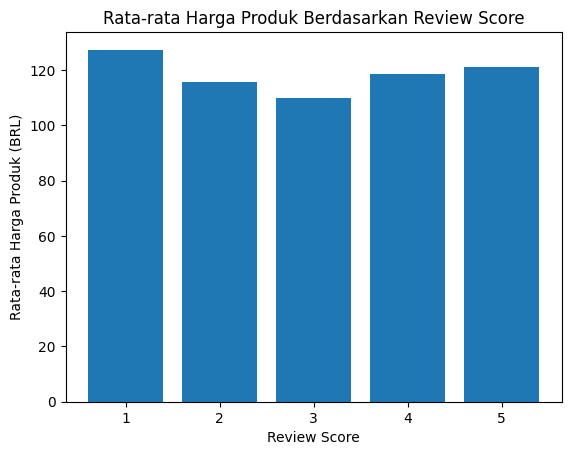

In [66]:
df = order_items_df.merge(order_reviews_df, on="order_id")
avg_price_per_score = df.groupby("review_score")["price"].mean()

plt.bar(avg_price_per_score.index.astype(str), avg_price_per_score.values)
plt.title("Rata-rata Harga Produk Berdasarkan Review Score")
plt.xlabel("Review Score")
plt.ylabel("Rata-rata Harga Produk (BRL)")
plt.show()

**Insight:**
Bisa diambil kesimpulan bahwa score review sebuah produk tidak berhubungan dengan harga dari barang tersebut. Bisa dilihat dari setiap review score dari skala 1 - 5 memiliki nilai rata-rata yang sama.

### Pertanyaan 6: Bagaimana Hubungan Waktu Pengiriman dengan Review Pengguna?

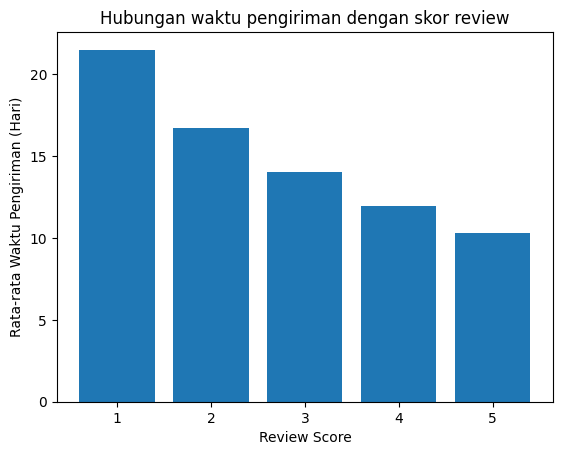

In [67]:
df = order_df.merge(order_reviews_df, on="order_id")
df["delivery_time"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days
avg_delivery_time = df.groupby("review_score")["delivery_time"].mean()

plt.bar(avg_delivery_time.index.astype(str), avg_delivery_time.values)
plt.title("Hubungan waktu pengiriman dengan skor review")
plt.xlabel("Review Score")
plt.ylabel("Rata-rata Waktu Pengiriman (Hari)")
plt.show()

**Insight:**
Salah satu penyebab dari review yang rendah diakibatkan oleh waktu pengiriman yang lama, semakin cepat barang sampai review yang diberikan semakin baik.

### Download semua Cleaned Data

Setelah tidak ada masalah, sebelum masuk ke bagian pembuatan dashboard saya menggabungkan seluruh cleaned data yang dibutuhkan untuk ditampilkan pada dashboard nantinya.

In [68]:
# Gabungkan semua data
all_df = order_items_df.merge(product_df, on="product_id", how="left")
all_df = all_df.merge(order_df, on="order_id", how="left")
all_df = all_df.merge(customers_df, on="customer_id", how="left")
all_df = all_df.merge(order_reviews_df[['order_id', 'review_score']], on="order_id", how="left")

# Tambahkan data pembayaran
order_payments_agg = order_payments_df.groupby("order_id")["payment_type"].apply(lambda x: ', '.join(x)).reset_index()
all_df = all_df.merge(order_payments_agg, on="order_id", how="left")

# Tambahkan waktu pengiriman dalam hari
all_df["delivery_days"] = (pd.to_datetime(all_df["order_delivered_customer_date"]) -
                           pd.to_datetime(all_df["order_purchase_timestamp"])).dt.days

# Simpan dataset yang sudah bersih
all_df.to_csv("all_data.csv", index=False)


## Conclusion

- Conclution pertanyaan 1

Dari analisis yang telah dilakukan, terdapat beberapa kesimpulan dari konsumen dan produk yang dijual. Pertama, meskipun sebagian besar ulasan produk mendapatkan skor yang baik, dengan skor 5 lebih dominan, tapi masih terdapat sekitar 10.000 ulasan dengan skor 1 yang menunjukkan adanya ketidakpuasan.


---


- Conclution pertanyaan 2

Metode pembayaran yang paling umum digunakan adalah kartu kredit.


---


- Conclution pertanyaan 3

Produk terlaris berasal dari kategori bed_bath_table, diikuti oleh health beauty dan sports leisure, dengan urutan sepuluh besar yang mencakup berbagai kategori lainnya. 3. Barang terlaris yang di adalah produk dengan kategori bed_bath_table, bila diurutkan dari 10 besar maka urutannya sebagai berikut ini:
1. Bed Bath Table
2. Health Beauty
3. Sports Leisure
4. Furniture Decore
5. Computer Accessories
6. Housewares
7. Watches Gifts
8. Telephony
9. Garden Tools
10. Auto (Otomotif)


---


- Conclution pertanyaan 4

Pengguna terbanyak berasal dari negara bagian San Paulo, dengan total lebih dari 41.000 pengguna.


---


- Conclution pertanyaan 5

Tidak ada hubungan yang signifikan antara skor ulasan dan harga produk, karena rata-rata skor dari 1 hingga 5 menunjukkan nilai yang serupa. Salah satu faktor yang mempengaruhi rendahnya skor ulasan adalah waktu pengiriman; semakin cepat barang sampai, semakin baik ulasan yang diberikan.


---


- Conclution pertanyaan 6

Meskipun ada banyak ulasan positif, perhatian terhadap waktu pengiriman dan pengalaman pelanggan secara keseluruhan tetap menjadi kunci untuk meningkatkan kepuasan dan ulasan produk.